<a href="https://colab.research.google.com/github/Airport237/image2sphere/blob/main/visualize_trained_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook loads the I2S model with pretrained weights on PASCAL3D+ and ModelNet10-SO(3).  The model predictions are visualized for several images from the test sets.  You can evaluate the PASCAL3D+ model on arbitary images that you upload.




# 0. Imports

In [1]:
%%capture
# ! git clone https://github.com/Airport237/image2sphere.git
# ! pip install -r image2sphere/requirements.txt

In [2]:

from src.visualizations import plot_predictions
from src.predictor import I2S
import numpy as np
import torch
import torchvision.transforms as T
import torchvision.transforms.functional as TF
from PIL import Image
import glob
import sys
import gdown

from e3nn import o3
from e3nn.o3 import Irreps
from e3nn.nn import Activation
sys.path.append('image2sphere')

# 1. PASCAL3D+

## Instantiate Pretrained I2S
Here, we create an instance of I2S and load weights from a model trained for 40 epochs on PASCAL3D+.

In [3]:
# # import gdown

# # Extract file ID: 1dWlvGp1QY3esAqZgOnPikR6TpJmBUngd
# file_id = '1dWlvGp1QY3esAqZgOnPikR6TpJmBUngd'
# url = f'https://drive.google.com/uc?id={file_id}'
# output = 'pascal3d_checkpoint.pt'

# gdown.download(url, output, quiet=False)

In [4]:
%%capture
# download the checkpoint
# !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1dWlvGp1QY3esAqZgOnPikR6TpJmBUngd' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1dWlvGp1QY3esAqZgOnPikR6TpJmBUngd" -O pascal3d_checkpoint.pt && rm -rf /tmp/cookies.txt

# use untrained resnet101 to avoid downloading weights that will be overwritten
# this will take a minute to generate the Wigner-D matrices for the output grid
model = I2S(encoder='resnet101', eval_grid_rec_level=3)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.load_state_dict(
    torch.load('pascal3d_checkpoint.pt', map_location=device)['model_state_dict']
)
model.eval()


# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# ckpt = torch.load(
#     '/Users/trymkyvag/Desktop/Northeastern/Fall 25/CS 7180/NOPE/image2sphere/assets/checkpoint.pt',
#     map_location=device
# )

# state_dict = ckpt['model_state_dict']

# # 1. Remove translation head weights from old checkpoint
# keys_to_remove = [k for k in state_dict if k.startswith('translation_head')]
# for k in keys_to_remove:
#     del state_dict[k]

# # 2. Add required buffers expected by current model
# state_dict['trans_mean'] = model.trans_mean
# state_dict['trans_std']  = model.trans_std

# # 3. Load safely
# model.load_state_dict(state_dict, strict=False)
# model.eval()

RuntimeError: Error(s) in loading state_dict for I2S:
	Missing key(s) in state_dict: "trans_mean", "trans_std". 

# Plot Predictions from PASCAL3D+ Test Set
We will load a subset of the PASCAL3D+ test set and visualize the predicted distributions of a pretrained I2S.

/Users/trymkyvag/Desktop/Northeastern/Fall 25/CS 7180/NOPE/image2sphere/src/visualizations.py:100: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([r'90$\degree$', None,


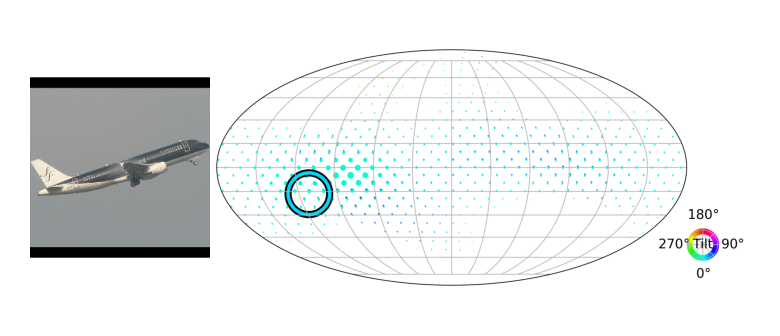

/Users/trymkyvag/Desktop/Northeastern/Fall 25/CS 7180/NOPE/image2sphere/src/visualizations.py:100: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([r'90$\degree$', None,


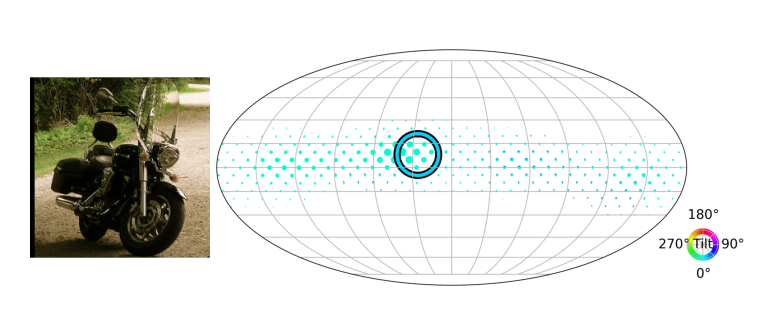

/Users/trymkyvag/Desktop/Northeastern/Fall 25/CS 7180/NOPE/image2sphere/src/visualizations.py:100: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([r'90$\degree$', None,


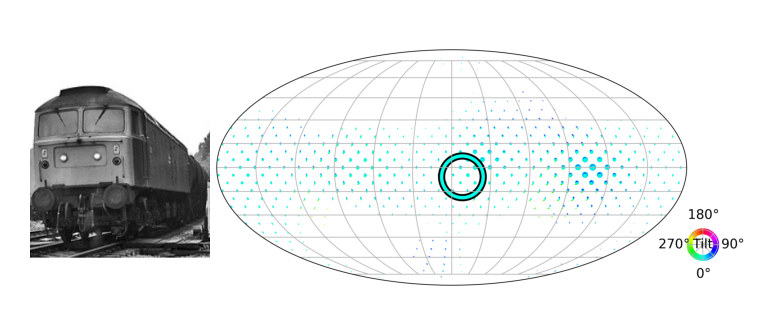

/Users/trymkyvag/Desktop/Northeastern/Fall 25/CS 7180/NOPE/image2sphere/src/visualizations.py:100: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([r'90$\degree$', None,


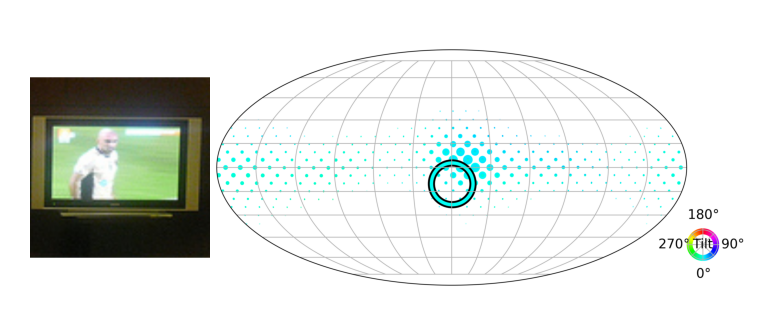

/Users/trymkyvag/Desktop/Northeastern/Fall 25/CS 7180/NOPE/image2sphere/src/visualizations.py:100: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([r'90$\degree$', None,


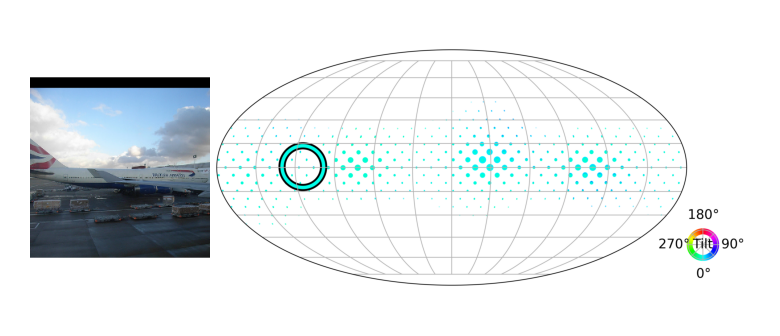

/Users/trymkyvag/Desktop/Northeastern/Fall 25/CS 7180/NOPE/image2sphere/src/visualizations.py:100: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([r'90$\degree$', None,


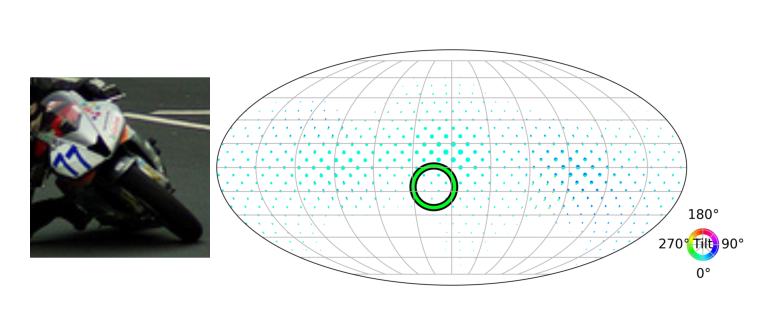

/Users/trymkyvag/Desktop/Northeastern/Fall 25/CS 7180/NOPE/image2sphere/src/visualizations.py:100: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([r'90$\degree$', None,


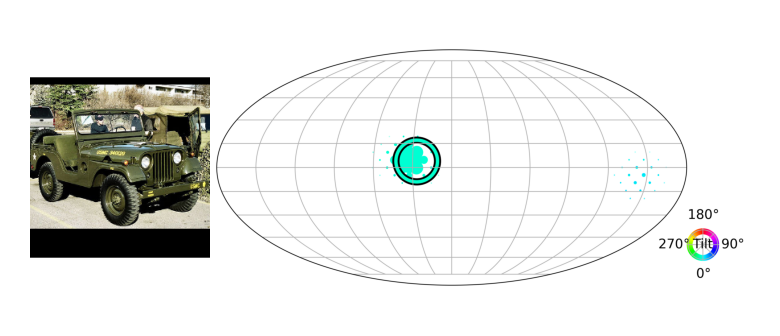

/Users/trymkyvag/Desktop/Northeastern/Fall 25/CS 7180/NOPE/image2sphere/src/visualizations.py:100: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([r'90$\degree$', None,


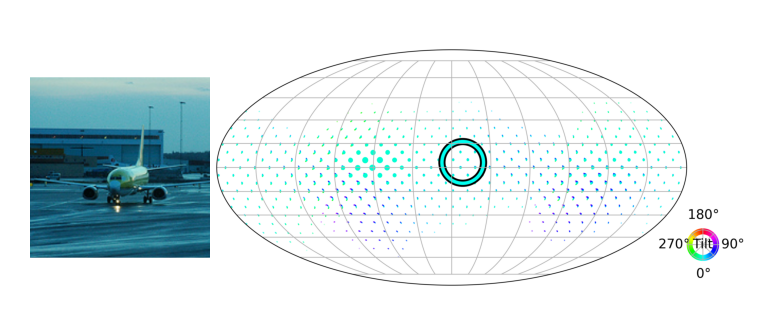

/Users/trymkyvag/Desktop/Northeastern/Fall 25/CS 7180/NOPE/image2sphere/src/visualizations.py:100: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([r'90$\degree$', None,


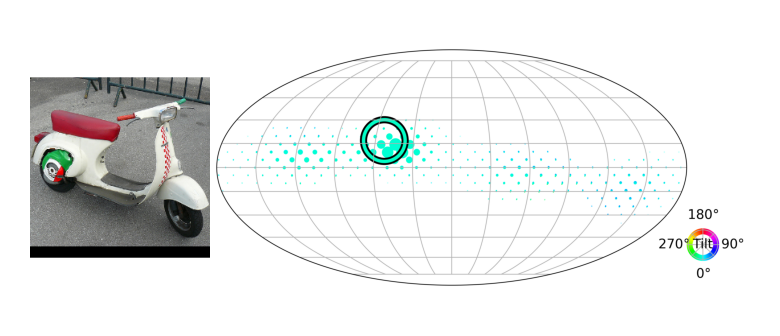

/Users/trymkyvag/Desktop/Northeastern/Fall 25/CS 7180/NOPE/image2sphere/src/visualizations.py:100: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([r'90$\degree$', None,


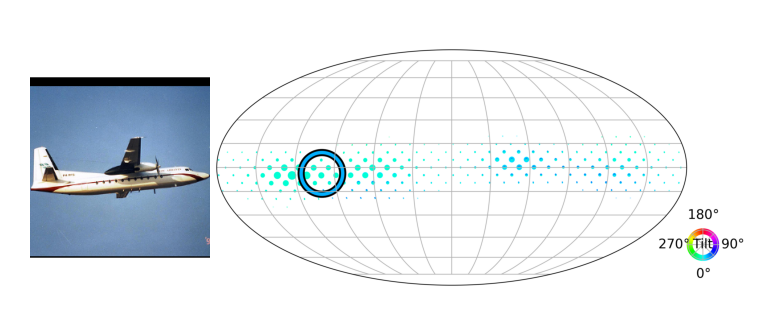

In [5]:
mini_pascal = np.load('assets/mini_pascal.npz')
imgs = mini_pascal['imgs']
rots = mini_pascal['rots']

for img, rot in zip(imgs, rots):
    img = T.ToTensor()(img).unsqueeze(0)
    rot = torch.from_numpy(rot).unsqueeze(0)

    prob = model.compute_probabilities(img, None)

    plot_predictions(img, prob, model.eval_rotmats, gt_rots=rot, num=1)

# Plot Predictions on Novel Images
Here, you can upload a custom image and visualize the prediction.  You will get more reasonable predictions if you upload an image of an object that exists in PASCAL3D+: {plane, bicycle, boat, bottle, bus, car, chair, table, motorbike, sofa, train, tv}.

In [6]:
# UPLOAD img: click "Choose Files" then select your image
# must be *.png or *.jpg (or change the glob command below)
# from google.colab import files
# uploaded = files.upload()

['assets/t1.png', 'assets/t11.png', 'assets/crop1.png', 'assets/crop11.png', 'assets/r1.png', 'assets/r11.png', 'assets/crop2.png', 'assets/crop22.png', 'assets/crop3.png', 'assets/crop33.png']


/Users/trymkyvag/Desktop/Northeastern/Fall 25/CS 7180/NOPE/image2sphere/src/visualizations.py:100: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([r'90$\degree$', None,


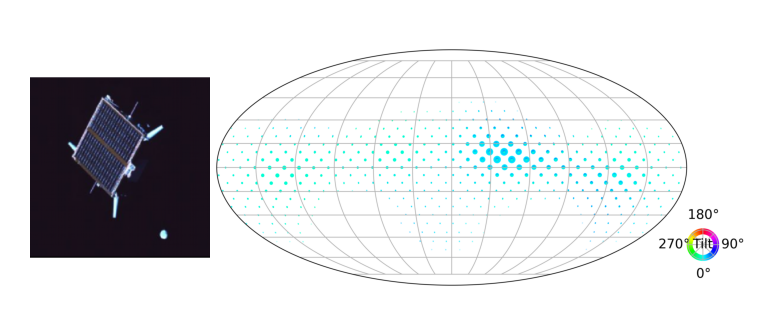

/Users/trymkyvag/Desktop/Northeastern/Fall 25/CS 7180/NOPE/image2sphere/src/visualizations.py:100: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([r'90$\degree$', None,


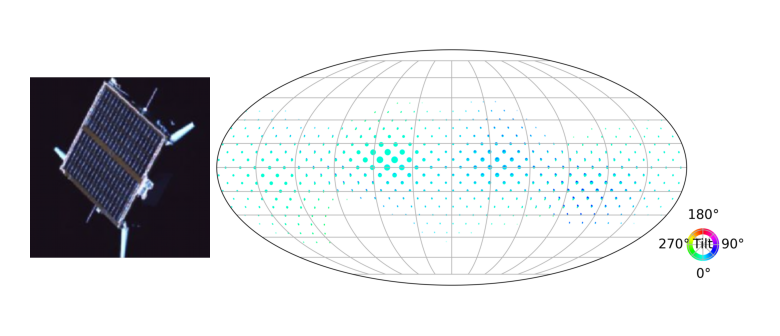

/Users/trymkyvag/Desktop/Northeastern/Fall 25/CS 7180/NOPE/image2sphere/src/visualizations.py:100: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([r'90$\degree$', None,


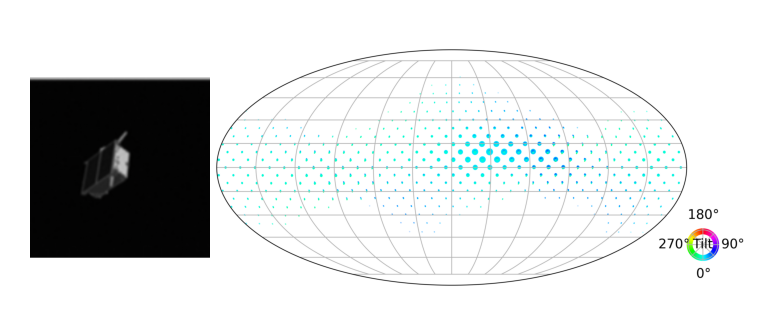

/Users/trymkyvag/Desktop/Northeastern/Fall 25/CS 7180/NOPE/image2sphere/src/visualizations.py:100: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([r'90$\degree$', None,


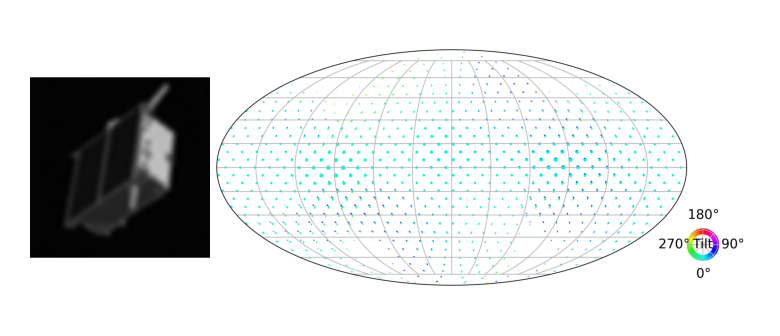

/Users/trymkyvag/Desktop/Northeastern/Fall 25/CS 7180/NOPE/image2sphere/src/visualizations.py:100: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([r'90$\degree$', None,


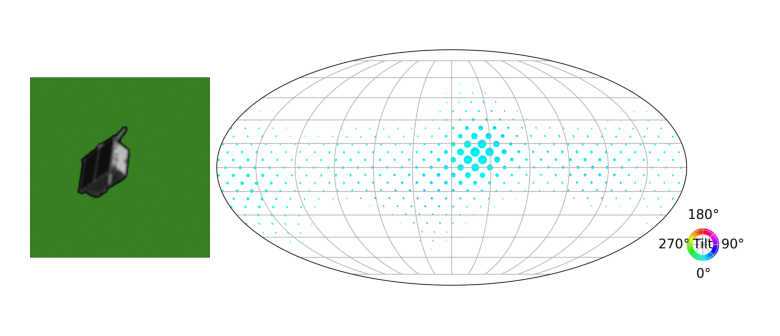

/Users/trymkyvag/Desktop/Northeastern/Fall 25/CS 7180/NOPE/image2sphere/src/visualizations.py:100: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([r'90$\degree$', None,


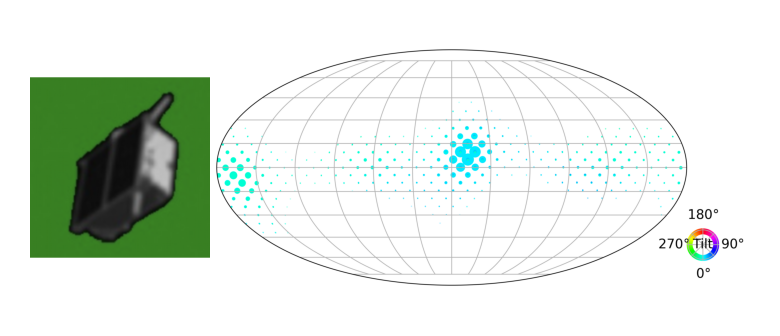

/Users/trymkyvag/Desktop/Northeastern/Fall 25/CS 7180/NOPE/image2sphere/src/visualizations.py:100: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([r'90$\degree$', None,


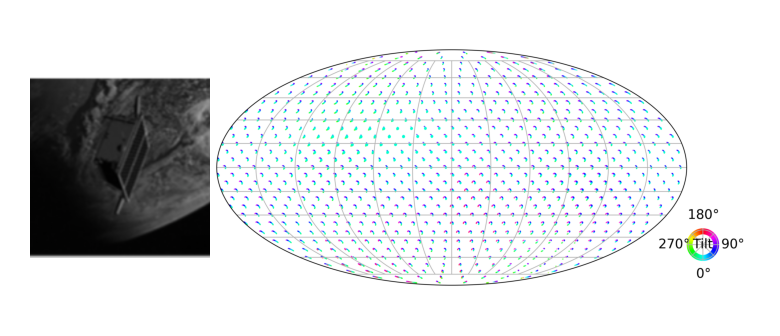

/Users/trymkyvag/Desktop/Northeastern/Fall 25/CS 7180/NOPE/image2sphere/src/visualizations.py:100: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([r'90$\degree$', None,


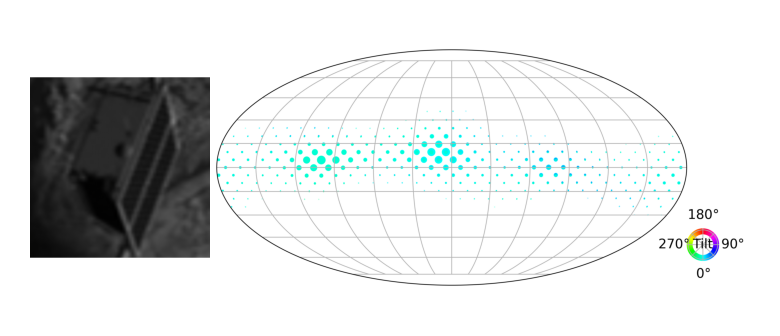

/Users/trymkyvag/Desktop/Northeastern/Fall 25/CS 7180/NOPE/image2sphere/src/visualizations.py:100: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([r'90$\degree$', None,


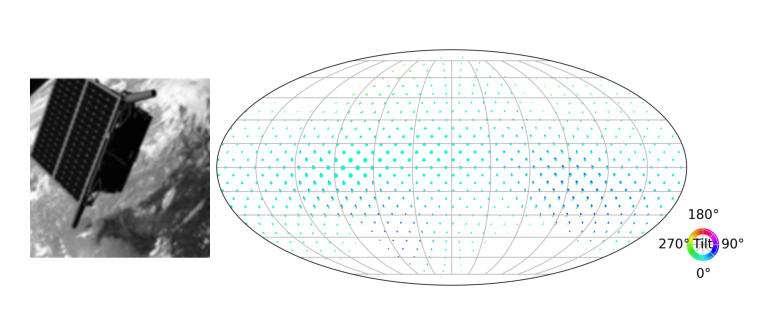

/Users/trymkyvag/Desktop/Northeastern/Fall 25/CS 7180/NOPE/image2sphere/src/visualizations.py:100: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([r'90$\degree$', None,


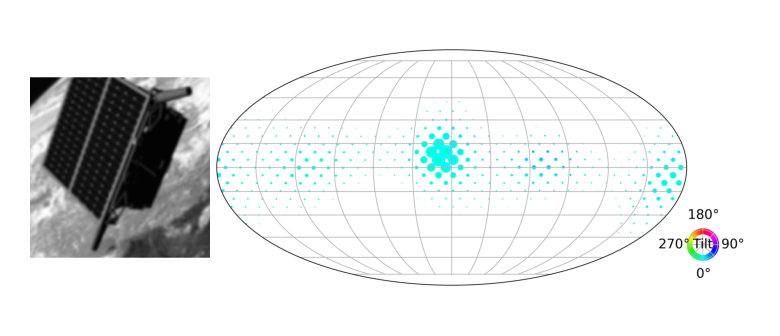

In [7]:
import glob
from PIL import Image
import torchvision.transforms as T
import torch


# replace with your own image paths or use glob
img_files = ["assets/t1.png", "assets/t11.png"]
img_files += ["assets/crop1.png", "assets/crop11.png"]
img_files += ["assets/r1.png", "assets/r11.png"]
img_files += ["assets/crop2.png", "assets/crop22.png"]
img_files += ["assets/crop3.png", "assets/crop33.png"]
# img_files = ["assets/d1.png", "assets/d11.png"]
#  "assets/t2.png", "assets/t2IR.png"]
# img_files = ["output/t1_contour.png"]
print(img_files)
for img_file in img_files:
    img = Image.open(
        img_file).convert('RGB')

    # resize and center crop
    img = T.ToTensor()(img)
    img = T.Resize(224)(img)
    img = T.CenterCrop(224)(img)
    img = img.unsqueeze(0)

    prob = model.compute_probabilities(img, None)  # type: ignore

    plot_predictions(img, prob, model.eval_rotmats, num=1)

# 2. ModelNet10-SO(3)

## Instantiate I2S with pretrained weights

In [8]:
%%capture
# download the checkpoint
# !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1wihL8AGfyrfDjp1mRjqkpvunMGfztSUa' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1wihL8AGfyrfDjp1mRjqkpvunMGfztSUa" -O modelnet10so3_checkpoint.pt && rm -rf /tmp/cookies.txt

# use untrained resnet50 to avoid downloading weights that will be overwritten
# this will take a minute to generate the Wigner-D matrices for the output grid
model = I2S(encoder='resnet50', eval_grid_rec_level=3)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.load_state_dict(
    torch.load('modelnet10so3_checkpoint.pt', map_location=device)['model_state_dict'],
)
model.eval()

UnpicklingError: invalid load key, '<'.

## Show Predictions on Test Set

In [9]:
%%capture
# download modelnet10 testset
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1-oEjRO9XCs_CVpIX1B59sdiwan6AhZt3' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1-oEjRO9XCs_CVpIX1B59sdiwan6AhZt3" -O modelnet10_test.npz && rm -rf /tmp/cookies.txt

modelnet = np.load('modelnet10_test.npz')
modelnet_imgs = np.repeat(modelnet['imgs'], 3, axis=-1)
modelnet_rots = modelnet['rots']

ValueError: Cannot load file containing pickled data when allow_pickle=False

In [10]:
# randomly select data point
i = np.random.randint(len(modelnet_imgs))
img = T.ToTensor()(modelnet_imgs[i]).unsqueeze(0)
rot = torch.from_numpy(modelnet_rots[i]).unsqueeze(0)

prob = model.compute_probabilities(img, None)
plot_predictions(img, prob, model.eval_rotmats, gt_rots=rot, num=1)

NameError: name 'modelnet_imgs' is not defined

## Robustness to Object Translation
Here we will see how robust I2S is to how well the object is centered in the image.  Keep in mind, the model was trained **only** on images where the object is perfectly centered.  To improve performance, we would want to retrain with random crop augmentations. You will notice some rotation error when the shift is greater than 20 pixels (i.e. 10% of image size).

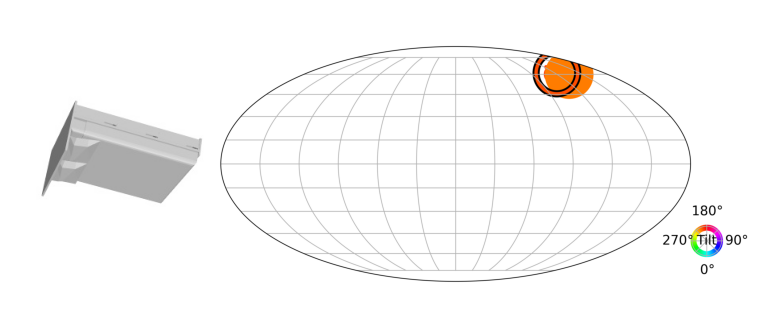

In [ ]:
SHIFT = 20
shift_img = TF.crop(
    TF.pad(img, SHIFT//2, fill=1),
    top=0, left=0, height=224, width=224
)

rot = torch.from_numpy(modelnet_rots[i]).unsqueeze(0)

prob = model.compute_probabilities(shift_img, None)
plot_predictions(img, prob, model.eval_rotmats, gt_rots=rot, num=1)